<a href="https://colab.research.google.com/github/mblackstock/notebooks/blob/main/notebooks/Baby_Names.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baby names part 1

First, lets get the baby names data.  You can find it yourself at https://www.ssa.gov/oact/babynames/limits.html

I've stored it in my github repository at mblackstock/notebooks

In [1]:
!git clone https://github.com/mblackstock/notebooks.git
!ls

Cloning into 'notebooks'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 207 (delta 25), reused 146 (delta 0), pack-reused 0
Receiving objects: 100% (207/207), 8.37 MiB | 19.35 MiB/s, done.
Resolving deltas: 100% (25/25), done.


Let's load up one of the files and have a look at it:

In [6]:
import pandas as pd
names1880 = pd.read_csv('notebooks/data/names/yob1880.txt', names=['name','sex','births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


We can manipulate the data by summing up the number of births by sex:

In [7]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In this data set, all of the birth data is split up by year, so if we want to analyse all of the data together, we can load them all up using a for loop.

In [10]:
years = range(1880, 2019)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
  path = 'notebooks/data/names/yob%d.txt' % year
  frame = pd.read_csv(path, names=columns)
  frame['year'] = year    # add a new column to the data frame
  pieces.append(frame)


Then we concatenate all of the pieces to make one big data frame

In [ ]:
# now concatenate all of the pieces together into one big data frame
names = pd.concat(pieces, ignore_index=True)

We can use the pivot_table function to sum up the number of births by year like this:

In [18]:
total_births = names.pivot_table('births', index='year',columns='sex', aggfunc=sum)
total_births

sex,F,M
year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442
...,...,...
2014,1783445,1917773
2015,1781725,1913059
2016,1767902,1893471


Now we have a data frame where the index is year, and the columns are the number of male and female births.  We can plot this fairly easily!

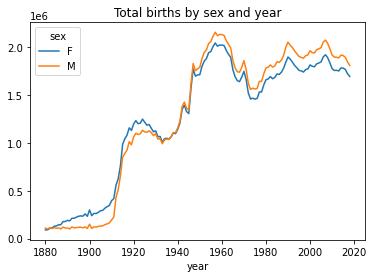

In [20]:
total_births.plot(title='Total births by sex and year')